# Exercise 2: AdaBoost

## Do not start the exercise until you fully understand the submission guidelines.


* The homework assignments are executed automatically. 
* Failure to comply with the following instructions will result in a significant penalty. 
* Appeals regarding your failure to read these instructions will be denied. 
* Kindly reminder: the homework assignments contribute 60% of the final grade.


## Read the following instructions carefully:

1. This Jupyter notebook contains all the step-by-step instructions needed for this exercise.
1. Write **efficient**, **vectorized** code whenever possible. Some calculations in this exercise may take several minutes when implemented efficiently, and might take much longer otherwise. Unnecessary loops will result in point deductions.
1. You are responsible for the correctness of your code and should add as many tests as you see fit to this jupyter notebook. Tests will not be graded nor checked.
1. You are allowed to use functions and methods from the [Python Standard Library](https://docs.python.org/3/library/).
1. Your code must run without errors. Use at least `numpy` 1.15.4. Any code that cannot run will not be graded.
1. Write your own code. Cheating will not be tolerated.
1. Submission includes a zip file that contains this notebook, with your ID as the file name. For example, `hw1_123456789_987654321.zip` if you submitted in pairs and `hw1_123456789.zip` if you submitted the exercise alone.
Please use only a **zip** file in your submission.

---
---

## Please sign that you have read and understood the instructions: 

### *** YOUR ID HERE ***

---
---


In [1]:
# Import necessary libraries
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# your implementations
You may add new cells, write helper functions or test code as you see fit.
Please use this cell and include a description of your implementation.
Explain code design consideration, algorithmic choices and any other details you think is relevant to understanding your implementation 

# PART 1 - AdaBoost Implementation

In [10]:
# Part 1: Implementing AdaBoost
from sklearn.tree import DecisionTreeClassifier
class AdaBoostCustom:
    def __init__(self, T):
        self.T = T
        self.alphas = []
        self.models = []
        # Note: You may add more attributes

    def fit(self, X, y):
        # a) Initialization
        # i) Initialize a zero model
        # ii)	Initialize the weights 

        n_samples, _ = X.shape
        w = np.full(n_samples, (1 / n_samples))
        
        # b) Boosting loop:
        for _ in range(self.T):
        # i) Train a weighted decision stump 
        # Your code here
            stump = DecisionTreeClassifier(max_depth=1, max_leaf_nodes=2)
            stump.fit(X, y, sample_weight=w)

        # ii) Calculate the weighted classification error
        # Your code here
            stump_pred = stump.predict(X)
            err = w[(stump_pred != y)].sum() / w.sum()

        # iii) Find the optimal step size
        # Your code here
            alpha = 0.5 * np.log((1 - err) / (err))
            self.alphas.append(alpha)
        # iv) Update the ensemble model 
        # Your code here
            self.models.append(stump)

        # v) Update the weights
        # Your code here
            w = w * np.exp(-alpha * y * stump_pred)
            w /= w.sum()

    
    def predict(self, X):  
        Y = np.array([model.predict(X) for model in self.models])
        return np.sign(np.dot(self.alphas, Y))


# generate test data

In [6]:
# Generate test dataset - change this to fit your needs
N = 200

X, y = make_classification(n_samples=N, n_features=2, n_informative=2,n_redundant=0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Test AdaBoost implementation 
Demonstrate your AdaBoost implementation.
Add plots and figures if needed.
Please use this cell to describe your results and tests

Custom AdaBoost Accuracy: 0.825
Sklearn AdaBoost Accuracy: 0.85


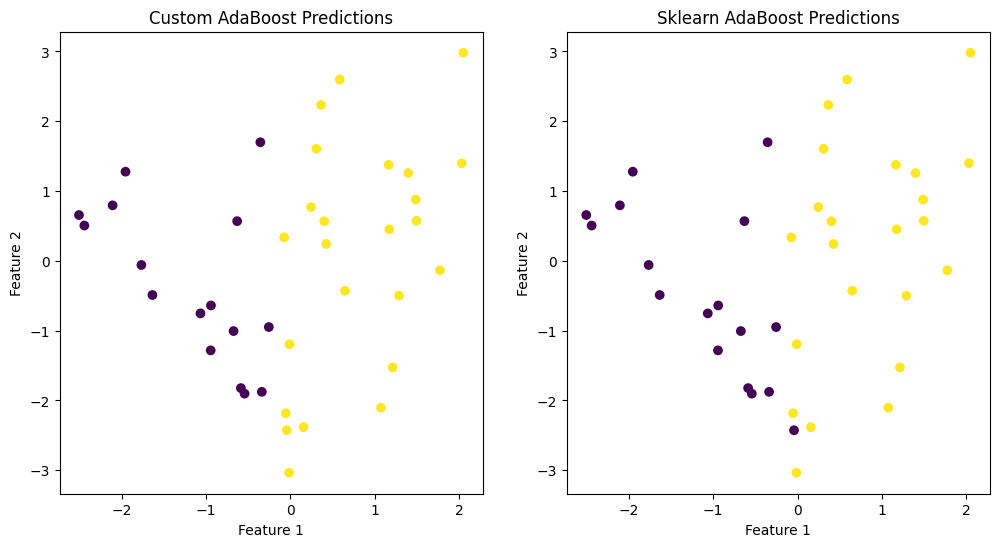

In [11]:
# Instantiate and train the AdaBoost model
custom_model = AdaBoostCustom(T=10)
custom_model.fit(X_train, y_train)

# Predictions and evaluation for custom AdaBoost
y_pred_custom = custom_model.predict(X_test)
custom_accuracy = accuracy_score(y_test, y_pred_custom)

# Instantiate and train the sklearn AdaBoost model
sklearn_model = AdaBoostClassifier(n_estimators=10, random_state=42)
sklearn_model.fit(X_train, y_train)
y_pred_sklearn = sklearn_model.predict(X_test)
sklearn_accuracy = accuracy_score(y_test, y_pred_sklearn)

y_pred_sklearn = sklearn_model.predict(X_test)
sklearn_accuracy = accuracy_score(y_test, y_pred_sklearn)

# Print accuracies
print(f"Custom AdaBoost Accuracy: {custom_accuracy}")
print(f"Sklearn AdaBoost Accuracy: {sklearn_accuracy}")

# Plotting comparisons
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_custom)
plt.title('Custom AdaBoost Predictions')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_sklearn)
plt.title('Sklearn AdaBoost Predictions')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# PART 2 - Experiments
Describe the experiments you decided to perform and explain the logic behind your decision.
Generate the test data, perform the experiments and report the results.
Use plots, tables and other visualizations as you see fit.
You can use as many code and markdown cells you need for the presentation to be clear.

In [22]:
from sklearn.datasets import make_moons
# Experiment 1
X1, y1 = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Experiment 2
X2, y2 = make_moons(n_samples=200, noise=0.2, random_state=42)


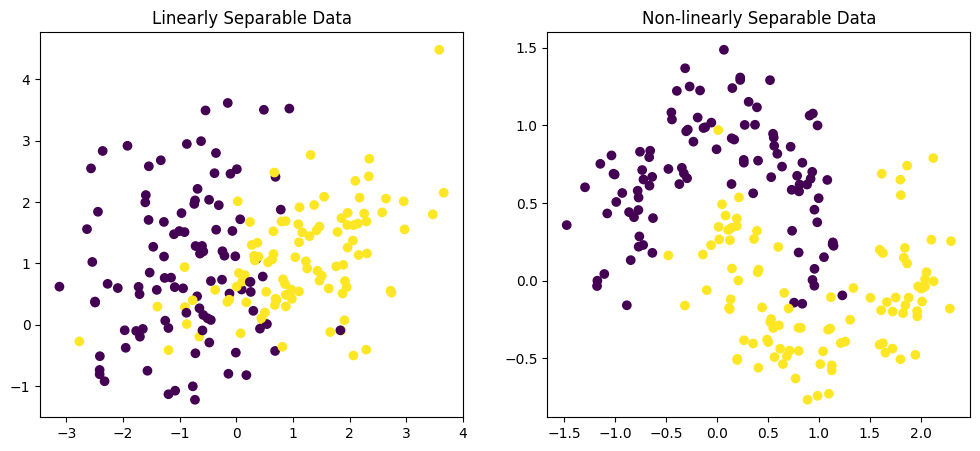

In [23]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X1[:, 0], X1[:, 1], c=y1)
plt.title('Expirement 1')

plt.subplot(1, 2, 2)
plt.scatter(X2[:, 0], X2[:, 1], c=y2)
plt.title('Expirement 2')

plt.show()

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

def eval_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    return accuracy, precision, f1, recall


models = {
    'Custom AdaBoost': AdaBoostCustom(T=10),
    'Sklearn AdaBoost': AdaBoostClassifier(n_estimators=10),
    'SVM': SVC(kernel='linear'),
    'Logistic Regression': LogisticRegression()
}

results1 = {}
results2 = {}

for name, model in models.items():
    results1[name] = eval_model(model, X1_train, y1_train, X1_test, y1_test)
    results2[name] = eval_model(model, X2_train, y2_train, X2_test, y2_test)
    


results1_df = pd.DataFrame(results1, index=['Accuracy', 'Precision', 'F1 Score', 'Recall']).T
results2_df = pd.DataFrame(results2, index=['Accuracy', 'Precision', 'F1 Score', 'Recall']).T

print("Results on Expirement 1")
print(results1_df)
print("\nResults on Expirement 2")
print(results2_df)

Results on Expirement 1
                     Accuracy  Precision  F1 Score    Recall
Custom AdaBoost      0.866667    0.80000  0.857143  0.923077
Sklearn AdaBoost     0.866667    0.80000  0.857143  0.923077
SVM                  0.866667    0.80000  0.857143  0.923077
Logistic Regression  0.866667    0.78125  0.862069  0.961538

Results on Expirement 2
                     Accuracy  Precision  F1 Score    Recall
Custom AdaBoost      0.666667   0.586957  0.729730  0.964286
Sklearn AdaBoost     0.950000   1.000000  0.943396  0.892857
SVM                  0.833333   0.909091  0.800000  0.714286
Logistic Regression  0.850000   0.913043  0.823529  0.750000


d) when it comes linearly seperable dataset (Expirement 1), all of the classification models tends to do just as good as each other with all performance measures. With non-linearly seperable datasets, my own custom adaBoost model does much worse than all the other models in terms of accuracy and precision, but is much better in recall. For expirement 2, it seems that Sklearn AdaBoost performs the best all round.

Part 3

The main and only GenAI tool i used was chatgpt. I used it mainly for suggestions of expirements aswell as how performance analysis and data visualisation. I also asked it for modules that have already implemented functions i need that will help me - for example DecisionTreeClassifer and the 3 classification models i compared to. I asked it for 2 data sets suggestions to use for the expirements that can demonstrate the properties of adaboost compared to other models - it suggested a linealy seprable data set and a non-linearly seprable data set. I also asked it for common performance measures of classification models in which it responded with a list, i ended up using Accuracy, Precision, F1 Score and Recall. It also asked it for code design when it comes to data visualisation. I asked it how to structure the results of the expirements, in which is suggested panda dataframes and gave me code design on how to use them. It also showed me code desing on how to plot data, as i wlays forget how to do so. 